In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from astropy.coordinates import get_sun, get_moon, SkyCoord
import astropy.units as u
import pandas as pd
import os

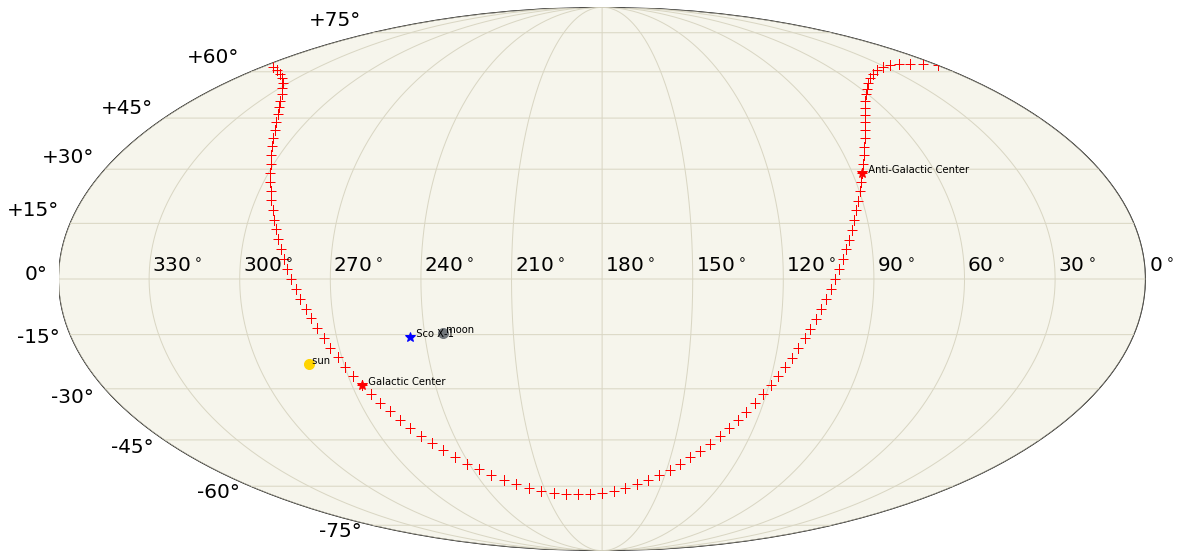

In [4]:
#########################
# Equatorial Coordinate #
# RA & Dec              #
#########################

projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection, lat_0=0, lon_0=180,
              resolution='l', area_thresh=1000.0, celestial=True, ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0], color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0], labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

time = Time('2019-01-02')
sun_position = get_sun(time)
sun_x,sun_y = map(sun_position.ra.deg, sun_position.dec.deg)
map.plot(sun_x, sun_y, 'o', color='#ffd400', markersize=10)
plt.text(sun_x, sun_y, ' sun', fontsize=10)

moon_position = get_moon(time)
moon_x,moon_y = map(moon_position.ra.deg, moon_position.dec.deg)
map.plot(moon_x, moon_y, 'o', color='#72777b', markersize=10)
plt.text(moon_x, moon_y, ' moon', fontsize=10)

mysourcestr=["16h19m55.07s -15d38m24.8s"]
mysource=SkyCoord(mysourcestr, frame='icrs')
x,y=map(mysource.ra.deg, mysource.dec.deg)
labels=['  Sco X-1']
for i in range(x.size):
    map.plot(x[i], y[i], color='b', marker='*', markersize=10)
    plt.text(x[i], y[i], labels[i], fontsize=10)
    
galactic_center=SkyCoord("0h 0d", frame='galactic').transform_to('icrs')
x,y=map(galactic_center.ra.deg, galactic_center.dec.deg)
map.plot(x, y, '*', color='red', markersize=10)
plt.text(x, y, '  Galactic Center', fontsize=10)

anti_galactic_center=SkyCoord("12h 0d", frame='galactic').transform_to('icrs')
x,y=map(anti_galactic_center.ra.deg, anti_galactic_center.dec.deg)
map.plot(x, y, '*', color='red', markersize=10)
plt.text(x, y, '  Anti-Galactic Center', fontsize=10)

for i in np.arange(0, 24, 0.2):
    galactic_plane=SkyCoord(str(i)+"h 0d", frame='galactic').transform_to('icrs')
    x,y=map(galactic_plane.ra.deg, galactic_plane.dec.deg)
    map.plot(x, y, '+', color='red', markersize=10)

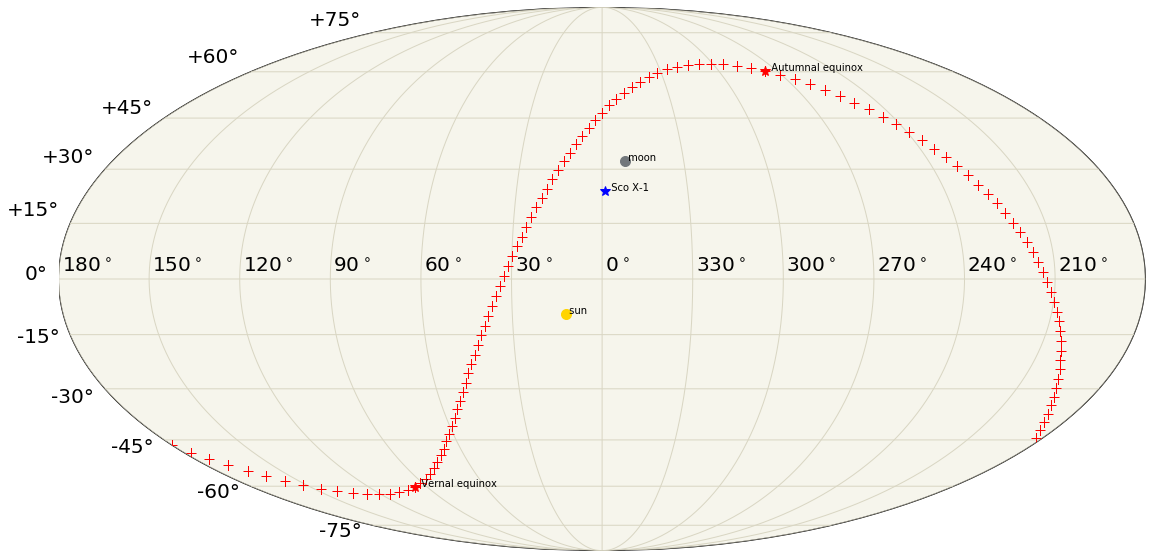

In [8]:
#######################
# Galactic coordinate #
# l & b               #
#######################

projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection, lat_0=0, lon_0=0,
              resolution='l', area_thresh=1000.0, celestial=True, ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0], color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0], labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

time = Time('2019-01-02')
sun_position = get_sun(time)
sun_lb = SkyCoord(sun_position.ra.deg, sun_position.dec.deg,frame='icrs',unit='deg').transform_to('galactic')
sun_x,sun_y = map(sun_lb.l.deg, sun_lb.b.deg)
map.plot(sun_x, sun_y, 'o', color='#ffd400', markersize=10)
plt.text(sun_x, sun_y, ' sun', fontsize=10)

moon_position = get_moon(time)
moon_lb = SkyCoord(moon_position.ra.deg, moon_position.dec.deg,frame='icrs',unit='deg').transform_to('galactic')
moon_x,moon_y = map(moon_lb.l.deg, moon_lb.b.deg)
map.plot(moon_x, moon_y, 'o', color='#72777b', markersize=10)
plt.text(moon_x, moon_y, ' moon', fontsize=10)

mysourcestr=["16h19m55.07s -15d38m24.8s"]
mysource_lb=SkyCoord(mysourcestr, frame='icrs').transform_to('galactic')
x,y=map(mysource_lb.l.deg, mysource_lb.b.deg)
labels=['  Sco X-1']
for i in range(x.size):
    map.plot(x[i], y[i], color='b', marker='*', markersize=10)
    plt.text(x[i], y[i], labels[i], fontsize=10)
    
vernal_equinox=SkyCoord("0h 0d", frame='icrs').transform_to('galactic')
x,y=map(vernal_equinox.l.deg, vernal_equinox.b.deg)
map.plot(x, y, '*', color='red', markersize=10)
plt.text(x, y, '  Vernal equinox', fontsize=10)

autumnal_equinox=SkyCoord("12h 0d", frame='icrs').transform_to('galactic')
x,y=map(autumnal_equinox.l.deg, autumnal_equinox.b.deg)
map.plot(x, y, '*', color='red', markersize=10)
plt.text(x, y, '  Autumnal equinox', fontsize=10)

for i in np.arange(0, 24, 0.2):
    equatorial_plane=SkyCoord(str(i)+"h 0d", frame='icrs').transform_to('galactic')
    x,y=map(equatorial_plane.l.deg, equatorial_plane.b.deg)
    map.plot(x, y, '+', color='red', markersize=10)

2586 2586


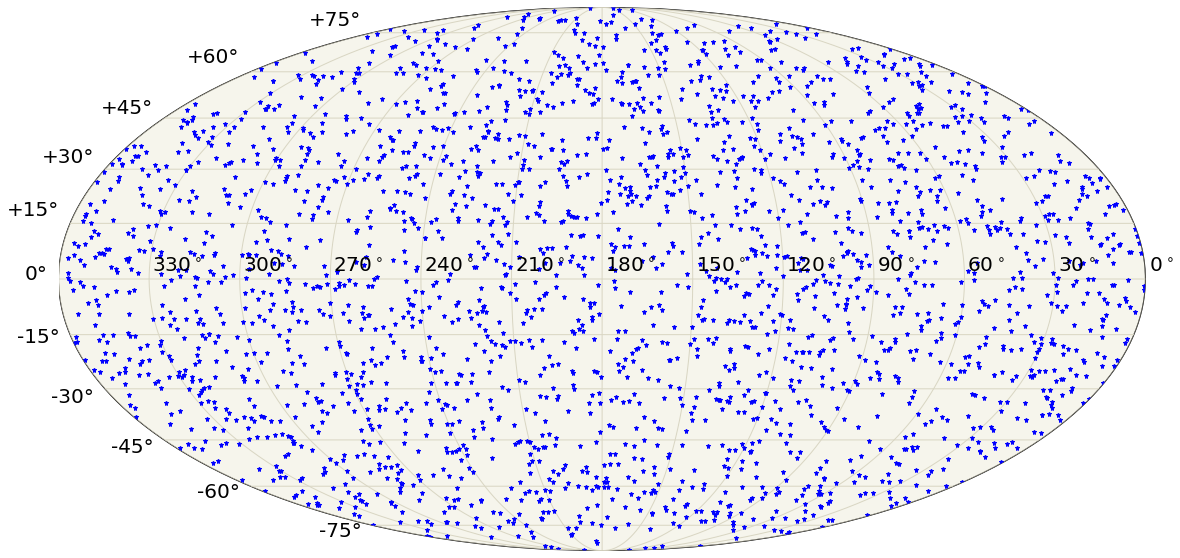

In [3]:
################
# Full catalog #
################
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

df = pd.read_csv('./fermigbrst.txt',delimiter='|',header=0,skipfooter=3,engine='python')
catalog_ra = df[df.columns[4]].apply(lambda x:x.split()).values
catalog_dec = df[df.columns[5]].apply(lambda x:x.split()).values

catalog_x=[]
catalog_y=[]
for i in range(len(catalog_ra)):
    ra = "{}h{}m{}s".format(catalog_ra[i][0],catalog_ra[i][1],catalog_ra[i][2])
    dec = "{}d{}m{}s".format(catalog_dec[i][0],catalog_dec[i][1],catalog_dec[i][2])
    mysource = SkyCoord(ra, dec, frame = 'icrs')
    x, y = map(mysource.ra.deg,mysource.dec.deg)
    catalog_x.extend([x])
    catalog_y.extend([y])
print(len(catalog_x),len(catalog_y))
map.plot(catalog_x, catalog_y, color='b',marker='*',markersize=5,ls='None')

1367 1367


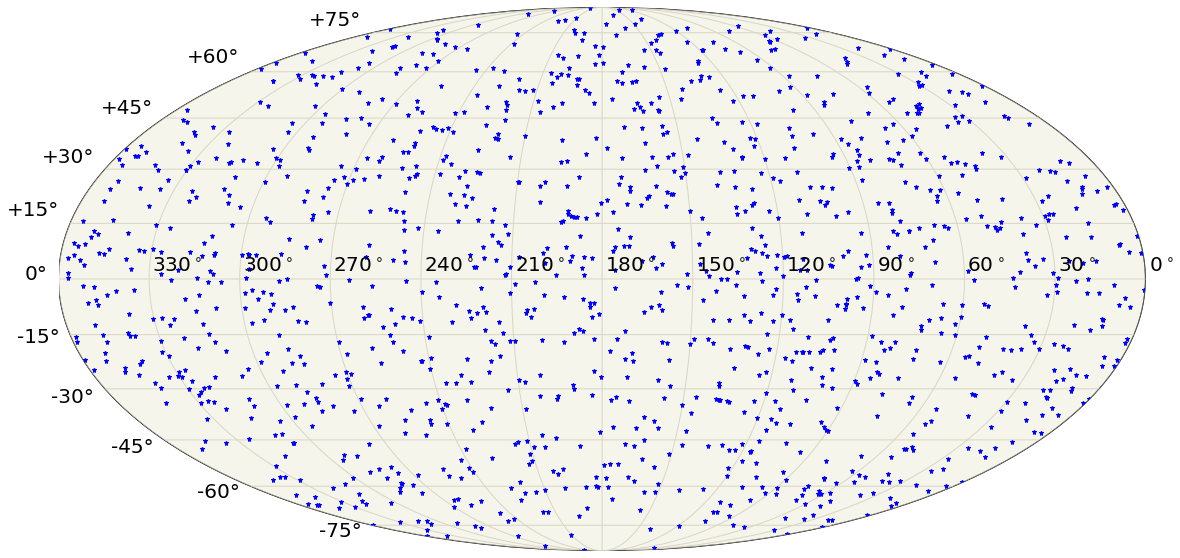

In [4]:
###################
# Partial catalog #
###################
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

df = pd.read_csv('./fermigbrst.txt',delimiter='|',header=0,skipfooter=3,engine='python')
catalog_bnname = df[df.columns[0]].apply(lambda x:x.strip()).values
catalog_ra = df[df.columns[4]].apply(lambda x:x.split()).values
catalog_dec = df[df.columns[5]].apply(lambda x:x.split()).values

df = pd.read_csv('./good_burst.csv')
good_burst_bnname = df['bnname'].apply(lambda x:x.strip()).values
good_burst_x=[]
good_burst_y=[]
for i in range(len(catalog_ra)):
    if catalog_bnname[i] in good_burst_bnname:
        ra = "{}h{}m{}s".format(catalog_ra[i][0],catalog_ra[i][1],catalog_ra[i][2])
        dec = "{}d{}m{}s".format(catalog_dec[i][0],catalog_dec[i][1],catalog_dec[i][2])
        mysource = SkyCoord(ra, dec, frame = 'icrs')
        x, y = map(mysource.ra.deg,mysource.dec.deg)
        good_burst_x.extend([x])
        good_burst_y.extend([y])
print(len(good_burst_x),len(good_burst_y))
map.plot(good_burst_x, good_burst_y, color='b',marker='*',markersize=5,ls='None')

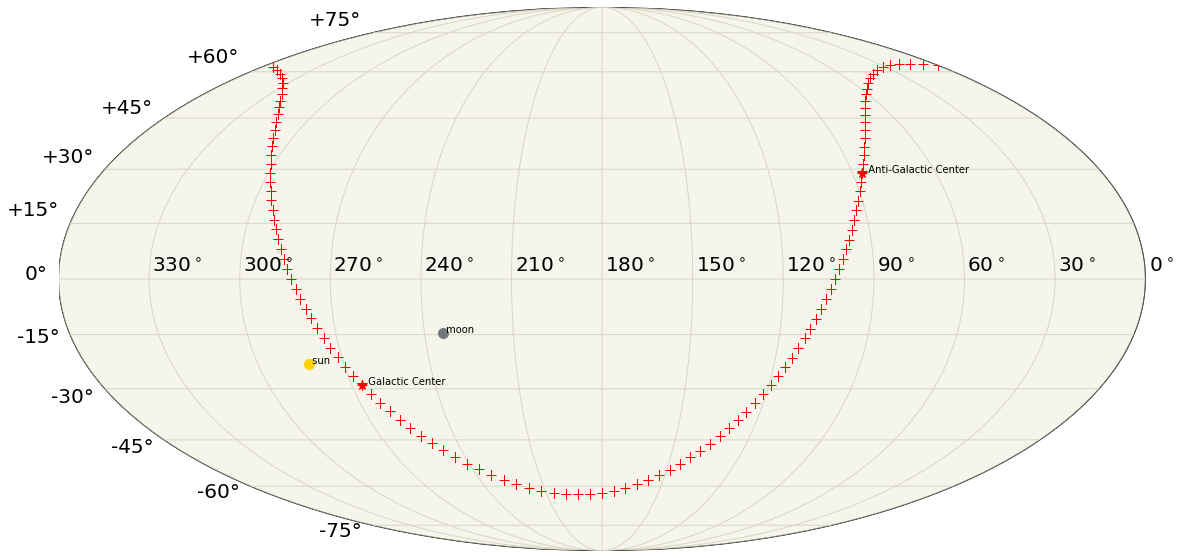

In [5]:
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection, lat_0=0, lon_0=180,
              resolution='l', area_thresh=1000.0, celestial=True, ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0], color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0], labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

time = Time('2019-01-02')
sun_position = get_sun(time)
sun_x,sun_y = map(sun_position.ra.deg, sun_position.dec.deg)
map.plot(sun_x, sun_y, 'o', color='#ffd400', markersize=10)
plt.text(sun_x, sun_y, ' sun', fontsize=10)

moon_position = get_moon(time)
moon_x,moon_y = map(moon_position.ra.deg, moon_position.dec.deg)
map.plot(moon_x, moon_y, 'o', color='#72777b', markersize=10)
plt.text(moon_x, moon_y, ' moon', fontsize=10)

  
galactic_center=SkyCoord("0h 0d", frame='galactic').transform_to('icrs')
x,y=map(galactic_center.ra.deg, galactic_center.dec.deg)
map.plot(x, y, '*', color='red', markersize=10)
plt.text(x, y, '  Galactic Center', fontsize=10)

anti_galactic_center=SkyCoord("12h 0d", frame='galactic').transform_to('icrs')
x,y=map(anti_galactic_center.ra.deg, anti_galactic_center.dec.deg)
map.plot(x, y, '*', color='red', markersize=10)
plt.text(x, y, '  Anti-Galactic Center', fontsize=10)

for i in np.arange(0, 24, 0.2):
    galactic_plane=SkyCoord(str(i)+"h 0d", frame='galactic').transform_to('icrs')
    x,y=map(galactic_plane.ra.deg, galactic_plane.dec.deg)
    map.plot(x, y, '+', color='red', markersize=10)